# Natural and horizontal visibility graphs

## Natural visibility graph

The natural visibility graph (NVG) is based on the idea that each observation of the time series is seen as a vertical bar with height equal to the numerical value of the observation and that these vertical bars are laid in a landscape, the top of a bar is visible from the tops of other bars. Each
node in the graph corresponds to a time stamp t of the time series, so the nodes are serially ordered. Two nodes are connected if there is a line of visibility between the corresponding data bars that is not intercepted.

(Silva, Vanessa Freitas, et al. "Time series analysis via network science: Concepts and algorithms." Wiley Interdisciplinary Reviews: Data Mining and Knowledge Discovery 11.3 (2021): e1404.)

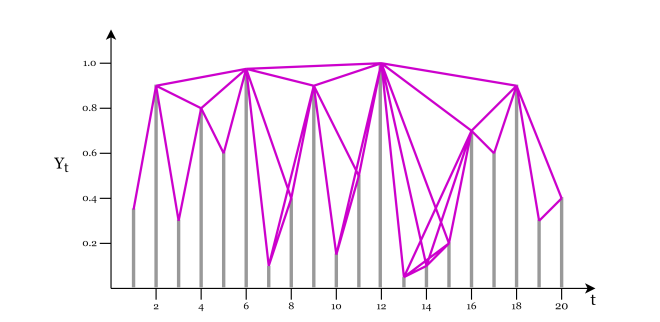  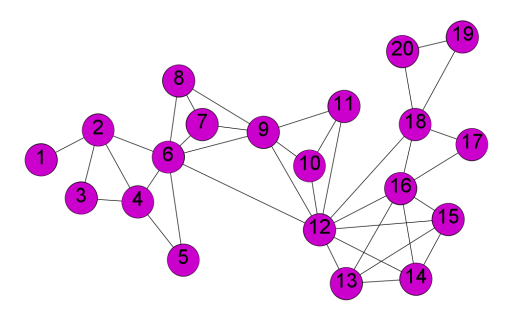

Here is an example of natural visibility graph made with our library:

In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

from core.model import Timeseries, TimeseriesPreprocessing, TimeseriesPreprocessingSegmentation, TimeseriesPreprocessingComposite, TimeseriesView, TimeGraph
from tsg_io.input import CsvFile
from to_graph.strategy_to_graph import BuildTimeseriesToGraphNaturalVisibilityStrategy, BuildTimeseriesToGraphHorizontalVisibilityStrategy
import warnings
warnings.filterwarnings('ignore')

amazon_path = os.path.join(os.getcwd(), "amazon", "AMZN.csv")

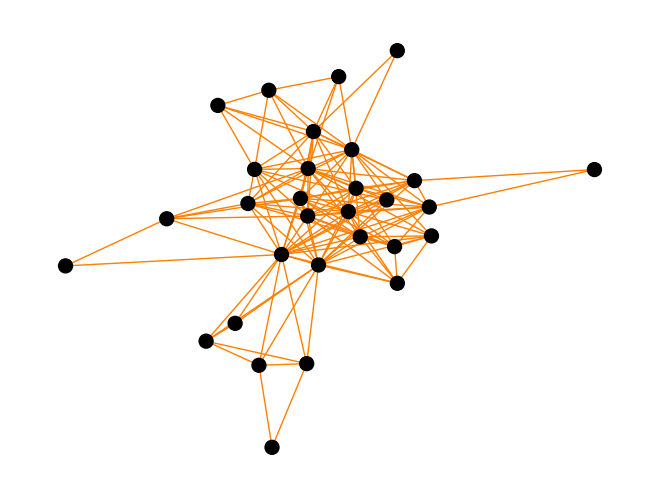

In [2]:
timegraph_natural_visibility = Timeseries(CsvFile(amazon_path, "Close").from_csv())\
    .with_preprocessing(TimeseriesPreprocessingSegmentation(60, 90))\
    .to_graph(BuildTimeseriesToGraphNaturalVisibilityStrategy().get_strategy())\
    .draw()

## Horizontal visibility graph

A simplified NVG method called the horizontal visibility graph inherits all natural visibility graph characteristics. The construction of horizontal visibility graphs differs from  that of natural visibility graphs in that the visibility lines are only horizontal:

(Silva, Vanessa Freitas, et al. "Time series analysis via network science: Concepts and algorithms." Wiley Interdisciplinary Reviews: Data Mining and Knowledge Discovery 11.3 (2021): e1404.)

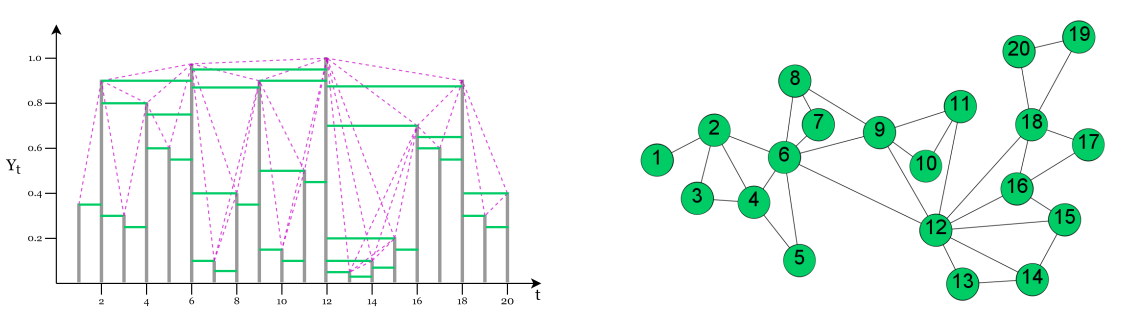

The green lines represent the horizontal lines of visibility between the data points and the purple lines the natural visibility, to comparison.


Here is an example of natural visibility graph made with our library:

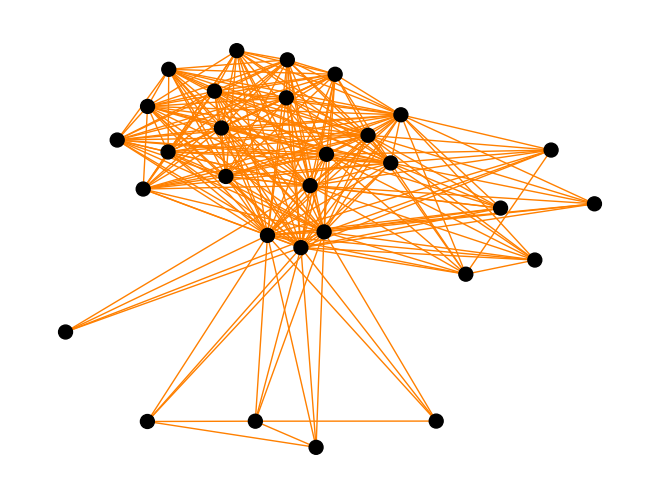

In [3]:
timegraph_horizontal_visibility = Timeseries(CsvFile(amazon_path, "Close").from_csv())\
    .with_preprocessing(TimeseriesPreprocessingSegmentation(60, 90))\
    .to_graph(BuildTimeseriesToGraphHorizontalVisibilityStrategy().get_strategy())\
    .draw()

## Additional visibility constraints

Along with natural and horizontal visibility strategy we can further constrain the connection of nodes with angle visibility contraint and limit algorithm.

### Angle visibility constraint

This strategy only allows the connection between nodes, if they are positioned from each other under the specified angle.

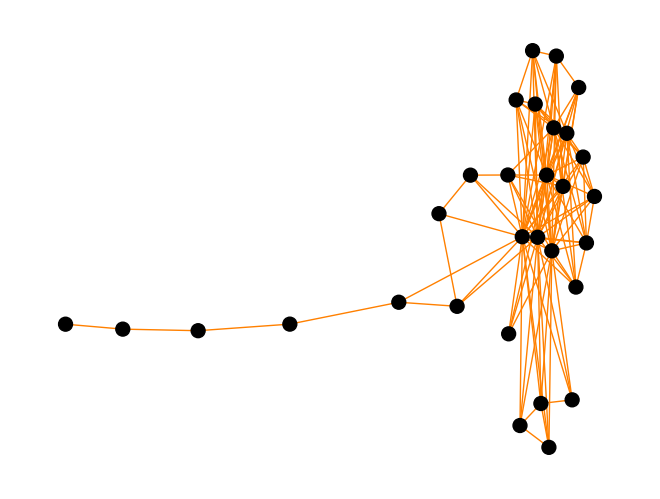

In [4]:
timegraph_natural_visibility_with_angle = Timeseries(CsvFile(amazon_path, "Close").from_csv())\
    .with_preprocessing(TimeseriesPreprocessingSegmentation(60, 90))\
    .to_graph(BuildTimeseriesToGraphHorizontalVisibilityStrategy().with_angle(0.09).get_strategy())\
    .draw()

### limit algorithm

This constraint tells the strategy, how many of the interruptions can be ignored, so that two nodes can be connected. If limit is 1, and we have natural visibility graph, we connect all the nodes, that cannot be seen between each other beacouse of one value between them.

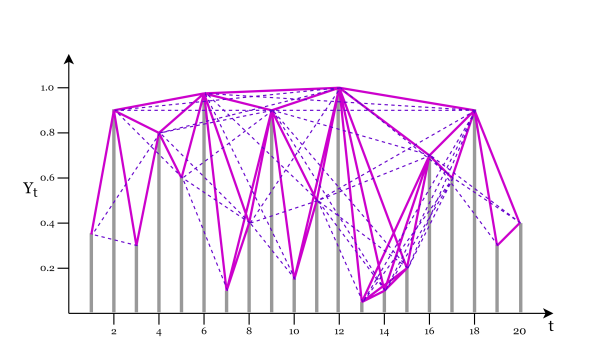

Illustrative example of limited penetrable visibility graph algorithm where the limit l = 1. The purple lines show the edges between points that have direct visibility (as in natural visibility graph, l = 0) and the blue dashed lines are the extra edges imposed by limit algorithm, where two points can be seen with only one higher intermediate point.

(Silva, Vanessa Freitas, et al. "Time series analysis via network science: Concepts and algorithms." Wiley Interdisciplinary Reviews: Data Mining and Knowledge Discovery 11.3 (2021): e1404.)

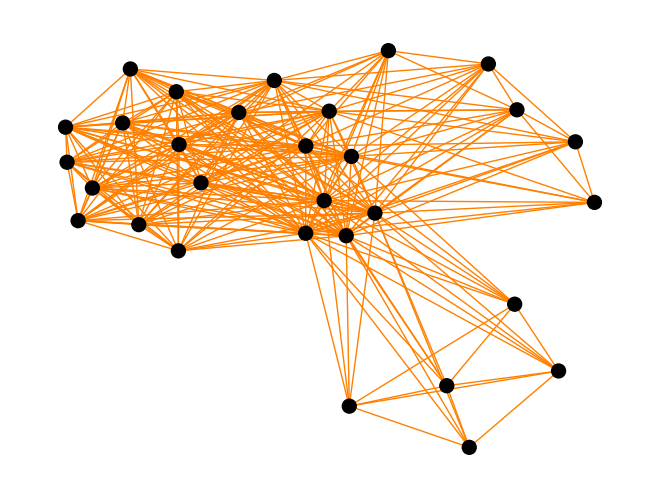

In [5]:
timegraph_natural_visibility_with_limit = Timeseries(CsvFile(amazon_path, "Close").from_csv())\
    .with_preprocessing(TimeseriesPreprocessingSegmentation(60, 90))\
    .to_graph(BuildTimeseriesToGraphHorizontalVisibilityStrategy().with_limit(2).get_strategy())\
    .draw()